In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community.community_louvain import best_partition
data=pd.read_csv("influence_data.csv",encoding="utf-8")

In [56]:
'''画网络图，这里不强调方向'''
follower=data['follower_id'].tolist()
influencer=data['influencer_id'].tolist()
List=[]
for i in range(len(follower)):
    List.append((follower[i],influencer[i]))
G=nx.Graph()
nodes=list(set(follower+influencer))
G.add_nodes_from(nodes)
G.add_edges_from(List)
# pos=nx.spring_layout(G)
# plt.figure(figsize=(100,100))
# nx.draw(G,pos,with_labels=False,font_weight='bold',node_color='yellowgreen',node_size=500,edge_color='thistle',linewidths=3.0)
# plt.show()

In [57]:
dict_fan={'Pop/Rock':1,'Country':2,'Classical':3,'Electronic':4,'Comedy/Spoken':5,
'Easy Listening':6,'Reggae':7,'Jazz':8,'R&B;':9,'Latin':10,'Vocal':11,
'Folk':12,'International':13,'Avant-Garde':14,'Blues':15,'Stage & Screen':16,'New Age':17,'Religious':18,
"Children's":19,'Unknown':20}
def get_label(x):
    x=str(x)
    return dict_fan[x]
def get_count_of_type(want):
    want=want
    data=pd.read_csv("influence_data.csv",encoding="utf-8")
    data["label1"]=data["influencer_main_genre"].apply(get_label)
    data["label2"]=data["follower_main_genre"].apply(get_label)
    want=data[(data['label1']==want)|(data['label2']==want)]
    want_follower=want['follower_id'].tolist()
    want_influencer=want['influencer_id'].tolist()
    want_nodes=list(set(want_follower+want_influencer))
    return want_nodes
def compute_corr(want1,want2):
    set1=set(get_count_of_type(want1))
    set2=set(get_count_of_type(want2))
    fenzi=len(list(set1.intersection(set2)))
    fenmu=len(list(set1.union(set2)))
    return fenzi/fenmu

In [58]:
import numpy as np
corr_matrix=np.zeros((20,20))
for i in range(20):
    for j in range(20):
        corr_matrix[i,j]=compute_corr(i+1,j+1)

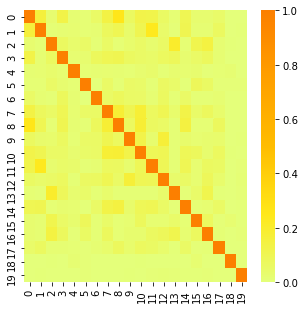

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,cmap='Wistia',annot=False)
plt.savefig("Picture/corr.png",dpi=500)

In [60]:
result=pd.DataFrame(corr_matrix)
result.to_csv("TempData/q3_corr.csv",index=False)